In [1]:
import pandas as pd

from src.constant import MAIN_DIR
from src.database import DB
from tqdm.auto import tqdm
import numpy as np

PHASE2_DIR = MAIN_DIR / "archive" / "phase2_bbob"

In [2]:
records = []
db_path_list = list((MAIN_DIR / "archive" / "phase2_bbob_trash").glob("run-policy-*.db"))
progress_bar = tqdm(total=len(db_path_list), desc="Processing")

for db_path in db_path_list:
    parts = db_path.stem.split("-")
    policy, parg, n_train = parts[3:6]
    progress_bar.set_description(f"{policy=}, {parg=}, {n_train=}") 

    db = DB(db_path)
    results = db.get_results()
    results_test = results.loc[results["prefix"].str.startswith("test")]
    # if results_test.shape[0] != 2500:
    if results_test.empty:
        print(f"No results {db_path}")
        db._conn.close()
        db_path.unlink()
        continue
    cost = (
        results.loc[results["prefix"].str.startswith("test")]
        .groupby(["instance_id", "prefix"])["cost"]
        .min()  # min for every problem (of 2 solvers)
        .reset_index()
        .groupby("instance_id")["cost"]
        .median()  # median over 5 runs
    )
    # if cost.max() >= 100:
        # print(f"Test cut-off {db_path}")
    cut_off_ratio = (cost >= 100).mean()
    cost.loc[cost >= 100] = 100
    cost = cost.mean()  # total mean score
    cpu_time = (
        results.loc[
            results["prefix"].str.startswith("config")
            & results["cached"].eq(0)
            & results["surrogate"].eq(0),
            "time",
        ].sum()
        / 3600
    )
    surrogate_pct = results.loc[results["prefix"].str.startswith("config")].groupby(["solver_id", "instance_id"])["surrogate"].max().mean()
    real_pct = results.loc[results["prefix"].str.startswith("config")].groupby(["solver_id", "instance_id"])["surrogate"].min().eq(0).mean()
    records.append(
        {
            "db_path": db_path.parts[-1],
            "n_train": n_train,
            "policy": policy,
            "parg": parg,
            "cost": cost,
            "cut_off_ratio": cut_off_ratio,
            "cpu_time": cpu_time,
            "surrogate_pct": surrogate_pct,
            "real_pct": real_pct,
        }
    )
    progress_bar.update(1)
progress_bar.close()

df2 = pd.DataFrame(records)
df2

Processing:   0%|          | 0/70 [00:00<?, ?it/s]

,db_path,n_train,policy,parg,cost,cut_off_ratio,cpu_time,surrogate_pct,real_pct
0,run-policy-bbob-baseline--25-1129023.db,25,baseline,,23.321004,0.200000,6.315510,0.00000,1.000000
1,run-policy-bbob-baseline--25-1130079.db,25,baseline,,25.767472,0.216667,7.929471,0.00000,1.000000
2,run-policy-bbob-baseline--25-1130259.db,25,baseline,,23.470321,0.200000,6.617559,0.00000,1.000000
3,run-policy-bbob-baseline--25-1130265.db,25,baseline,,23.004915,0.195833,6.293475,0.00000,1.000000
4,run-policy-bbob-baseline--25-1130271.db,25,baseline,,24.908410,0.212500,6.159116,0.00000,1.000000
...,...,...,...,...,...,...,...,...,...
65,run-policy-bbob-ib--25-1129274.db,25,ib,,27.091647,0.241667,1.719301,0.97449,0.255102
66,run-policy-bbob-ib--25-1129286.db,25,ib,,19.897140,0.158333,1.106329,0.97449,0.147959
67,run-policy-bbob-ib--25-1129634.db,25,ib,,19.634516,0.162500,2.551943,0.97449,0.331633
68,run-policy-bbob-ib--25-1129640.db,25,ib,,27.213092,0.245833,1.943227,0.97449,0.301020


In [3]:
records = []
db_path_list = list(PHASE2_DIR.glob("run-policy-*.db"))
progress_bar = tqdm(total=len(db_path_list), desc="Processing")

for db_path in db_path_list:
    parts = db_path.stem.split("-")
    policy, parg, n_train = parts[3:6]
    progress_bar.set_description(f"{policy=}, {parg=}, {n_train=}") 

    db = DB(db_path)
    results = db.get_results()
    results_test = results.loc[results["prefix"].str.startswith("test")]
    # if results_test.shape[0] != 2500:
    if results_test.empty:
        print(f"No results {db_path}")
        db._conn.close()
        db_path.unlink()
        continue
    cost = (
        results.loc[results["prefix"].str.startswith("test")]
        .groupby(["instance_id", "prefix"])["cost"]
        .min()  # min for every problem (of 2 solvers)
        .reset_index()
        .groupby("instance_id")["cost"]
        .median()  # median over 5 runs
    )
    # if cost.max() >= 100:
        # print(f"Test cut-off {db_path}")
    cut_off_ratio = (cost >= 100).mean()
    cost.loc[cost >= 100] = 100
    cost = cost.mean()  # total mean score
    cpu_time = (
        results.loc[
            results["prefix"].str.startswith("config")
            & results["cached"].eq(0)
            & results["surrogate"].eq(0),
            "time",
        ].sum()
        / 3600
    )
    surrogate_pct = results.loc[results["prefix"].str.startswith("config")].groupby(["solver_id", "instance_id"])["surrogate"].max().mean()
    real_pct = results.loc[results["prefix"].str.startswith("config")].groupby(["solver_id", "instance_id"])["surrogate"].min().eq(0).mean()
    records.append(
        {
            "db_path": db_path.parts[-1],
            "n_train": n_train,
            "policy": policy,
            "parg": parg,
            "cost": cost,
            "cut_off_ratio": cut_off_ratio,
            "cpu_time": cpu_time,
            "surrogate_pct": surrogate_pct,
            "real_pct": real_pct,
        }
    )
    progress_bar.update(1)
progress_bar.close()

df = pd.DataFrame(records)
df

Processing:   0%|          | 0/280 [00:00<?, ?it/s]

,db_path,n_train,policy,parg,cost,cut_off_ratio,cpu_time,surrogate_pct,real_pct
0,run-policy-bbob-baseline--25-1129015.db,25,baseline,,20.552887,0.166667,6.473403,0.00000,1.000000
1,run-policy-bbob-baseline--25-1129029.db,25,baseline,,22.450362,0.187500,6.156015,0.00000,1.000000
2,run-policy-bbob-baseline--25-1129263.db,25,baseline,,22.316469,0.183333,7.819009,0.00000,1.000000
3,run-policy-bbob-baseline--25-1129269.db,25,baseline,,21.706169,0.187500,6.614892,0.00000,1.000000
4,run-policy-bbob-baseline--25-1129275.db,25,baseline,,20.530386,0.170833,7.359368,0.00000,1.000000
...,...,...,...,...,...,...,...,...,...
275,run-policy-bbob-ib--25-1130114.db,25,ib,,20.020777,0.166667,2.136719,0.97449,0.285714
276,run-policy-bbob-ib--25-1130264.db,25,ib,,22.361963,0.187500,1.147631,0.97449,0.183673
277,run-policy-bbob-ib--25-1130270.db,25,ib,,23.152135,0.204167,1.301194,0.97449,0.209184
278,run-policy-bbob-ib--25-1130276.db,25,ib,,22.140811,0.191667,1.593402,0.97449,0.265306


In [18]:
df.pivot_table(index=["policy", "parg"], columns="n_train", values="cpu_time", aggfunc="count")

n_train        25
policy   parg    
baseline       20
ea       25    20
         50    20
         75    20
eb       25    20
         50    20
         75    20
ec       100   20
         50    20
         75    20
ia       1+1   20
         1+2   20
         2+1   20
ib             20

In [19]:
IDX = [
    ("baseline", ""),
    ("ea", "25"),
    ("ea", "50"),
    ("ea", "75"),
    ("eb", "75"),
    ("eb", "50"),
    ("eb", "25"),
    ("ec", "100"),
    ("ec", "75"),
    ("ec", "50"),
    ("ia", "1+2"),
    ("ia", "1+1"),
    ("ia", "2+1"),
    ("ib", ""),
]

def agg(x):
    df_agg = x.groupby(["policy", "parg"]).agg(
        cost=("cost", "mean"),
        cut_off_ratio=("cut_off_ratio", "mean"),
        cpu_time=("cpu_time", "mean"),
        surrogate_pct=("surrogate_pct", "mean"),
        real_pct=("real_pct", "mean"),
    )
    baseline_cost = df_agg.at[("baseline", ""), "cost"]
    baseline_cut_off_ratio = df_agg.at[("baseline", ""), "cut_off_ratio"]
    baseline_cpu_time = df_agg.at[("baseline", ""), "cpu_time"]
    df_agg["cost_ratio_to_baseline"] = df_agg["cost"] / baseline_cost
    df_agg["cut_off_ratio_ratio_to_baseline"] = df_agg["cut_off_ratio"] / baseline_cut_off_ratio
    df_agg["cpu_time_ratio_to_baseline"] = df_agg["cpu_time"] / baseline_cpu_time
    df_agg["alpha"] = baseline_cost / df_agg["cost"]
    df_agg["beta"] = (baseline_cpu_time - df_agg["cpu_time"]) * 3600 / df_agg["cost"]
    df_agg["better_than_baseline_until"] = np.floor(df_agg["beta"] / (1 - df_agg["alpha"])) + 1
    df_agg.loc[df_agg["beta"] < 0, "better_than_baseline_until"] = np.nan

    df_agg = df_agg.round(4)
    df_agg = df_agg.loc[IDX, ["cost", "cost_ratio_to_baseline", "cut_off_ratio", "cut_off_ratio_ratio_to_baseline", "cpu_time", "cpu_time_ratio_to_baseline", "surrogate_pct", "real_pct", "alpha", "beta", "better_than_baseline_until"]]
    return df_agg

df25 = df.loc[df["n_train"] == "25"].copy()
df100 = df.loc[df["n_train"] == "100"].copy()
df250 = df.loc[df["n_train"] == "250"].copy()

df25_agg = agg(df25)
# df100_agg = agg(df100)
# df250_agg = agg(df250)

In [20]:
df25_agg

cost  cost_ratio_to_baseline  cut_off_ratio  \
policy   parg                                                   
baseline       21.3161                  1.0000         0.1767   
ea       25    21.5617                  1.0115         0.1773   
         50    21.7142                  1.0187         0.1796   
         75    22.2190                  1.0424         0.1856   
eb       75    22.2005                  1.0415         0.1850   
         50    22.8018                  1.0697         0.1940   
         25    23.3258                  1.0943         0.1979   
ec       100   21.5293                  1.0100         0.1792   
         75    22.2256                  1.0427         0.1867   
         50    23.1834                  1.0876         0.1965   
ia       1+2   21.5692                  1.0119         0.1788   
         1+1   21.8277                  1.0240         0.1812   
         2+1   22.1473                  1.0390         0.1865   
ib             22.2111                  1.0420         0.1873   

               cut_off_ratio_ratio_to_baseline  cpu_time  \
policy   parg                                              
baseline                                1.0000    7.2223   
ea       25                             1.0035    5.3735   
         50                             1.0165    3.7507   
         75                             1.0507    1.9948   
eb       75                             1.0472    3.4079   
         50                             1.0979    1.9262   
         25                             1.1203    0.8529   
ec       100                            1.0142   13.6555   
         75                             1.0566   10.8446   
         50                             1.1120    7.5775   
ia       1+2                            1.0118    4.8435   
         1+1                            1.0259    3.7702   
         2+1                            1.0554    2.4600   
ib                                      1.0601    1.7235   

               cpu_time_ratio_to_baseline  surrogate_pct  real_pct   alpha  \
policy   parg                                                                
baseline                           1.0000         0.0000    1.0000  1.0000   
ea       25                        0.7440         0.2445    0.7579  0.9886   
         50                        0.5193         0.4886    0.5166  0.9817   
         75                        0.2762         0.7288    0.2792  0.9594   
eb       75                        0.4719         0.9745    0.7686  0.9602   
         50                        0.2667         0.9745    0.5371  0.9348   
         25                        0.1181         0.9745    0.3057  0.9138   
ec       100                       1.8907         0.9745    1.0000  0.9901   
         75                        1.5015         0.9745    1.0000  0.9591   
         50                        1.0492         0.9745    1.0000  0.9195   
ia       1+2                       0.6706         0.3265    0.6755  0.9883   
         1+1                       0.5220         0.4898    0.5122  0.9766   
         2+1                       0.3406         0.6531    0.3523  0.9625   
ib                                 0.2386         0.9745    0.2464  0.9597   

                    beta  better_than_baseline_until  
policy   parg                                         
baseline          0.0000                         NaN  
ea       25     308.6771                     27108.0  
         50     575.5542                     31395.0  
         75     846.9722                     20843.0  
eb       75     618.5368                     15528.0  
         50     836.1660                     12834.0  
         25     983.0335                     11411.0  
ec       100  -1075.7098                         NaN  
         75    -586.7196                         NaN  
         50     -55.1544                         NaN  
ia       1+2    397.0335                     33835.0  
         1+1    569.3581                     24295.0

In [14]:
# df250_agg.to_excel("tmp.xlsx")

In [9]:
df.loc[(df["policy"] == "ia") & (df["parg"] == "1+1") & (df["n_train"] == "25")].sort_values(by="cost")

,db_path,n_train,policy,parg,cost,cut_off_ratio,cpu_time,surrogate_pct,real_pct
202,run-policy-bbob-ia-1+1-25-1129279.db,25,ia,1+1,19.821342,0.158333,3.805545,0.489796,0.510204
205,run-policy-bbob-ia-1+1-25-1129645.db,25,ia,1+1,20.202983,0.166667,4.117436,0.489796,0.510204
207,run-policy-bbob-ia-1+1-25-1130065.db,25,ia,1+1,20.336695,0.166667,4.215352,0.489796,0.515306
213,run-policy-bbob-ia-1+1-25-1130107.db,25,ia,1+1,20.364883,0.166667,3.985931,0.489796,0.510204
203,run-policy-bbob-ia-1+1-25-1129285.db,25,ia,1+1,20.745979,0.166667,3.882690,0.489796,0.510204
206,run-policy-bbob-ia-1+1-25-1130059.db,25,ia,1+1,20.943490,0.170833,4.070511,0.489796,0.510204
215,run-policy-bbob-ia-1+1-25-1130263.db,25,ia,1+1,21.032540,0.175000,3.393395,0.489796,0.515306
208,run-policy-bbob-ia-1+1-25-1130077.db,25,ia,1+1,21.215718,0.179167,4.063395,0.489796,0.510204
218,run-policy-bbob-ia-1+1-25-1130281.db,25,ia,1+1,21.328405,0.175000,4.035549,0.489796,0.515306
210,run-policy-bbob-ia-1+1-25-1130089.db,25,ia,1+1,21.460001,0.175000,4.094688,0.489796,0.510204


In [10]:
df2.loc[(df2["policy"] == "ia") & (df2["parg"] == "1+1") & (df2["n_train"] == "25")].sort_values(by="cost")

,db_path,n_train,policy,parg,cost,cut_off_ratio,cpu_time,surrogate_pct,real_pct
53,run-policy-bbob-ia-1+1-25-1129639.db,25,ia,1+1,19.388547,0.158333,3.323945,0.489796,0.510204
52,run-policy-bbob-ia-1+1-25-1129267.db,25,ia,1+1,19.607322,0.158333,4.057391,0.489796,0.515306
54,run-policy-bbob-ia-1+1-25-1130071.db,25,ia,1+1,19.754058,0.162500,2.852097,0.489796,0.510204
50,run-policy-bbob-ia-1+1-25-1129027.db,25,ia,1+1,25.099894,0.216667,3.283462,0.489796,0.510204
51,run-policy-bbob-ia-1+1-25-1129033.db,25,ia,1+1,26.853550,0.237500,3.235593,0.489796,0.515306


In [16]:
# db = DB(PHASE2_DIR / "run-policy-ib--100-1016238.db")

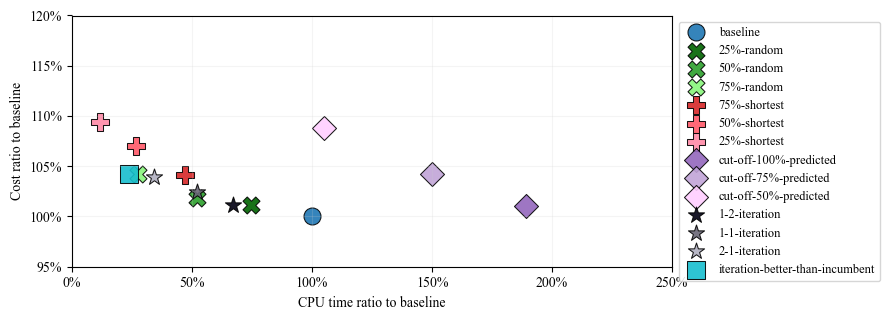

In [11]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.alpha"] = 0.2
plt.rcParams["grid.color"] = "#cccccc"
plt.rcParams["axes.xmargin"] = 0

COLORS = {
    ("baseline", ""): "#1f77b4",
    ("ea", "25"): "#006300",
    ("ea", "50"): "#2ca02c",
    ("ea", "75"): "#89f57b",
    ("eb", "75"): "#d62728",
    ("eb", "50"): "#ff5968",
    ("eb", "25"): "#ff8aa7",
    ("ec", "100"): "#9467bd",
    ("ec", "75"): "#c1a4d8",
    ("ec", "50"): "#ffcfff",
    ("ia", "1+2"): "#010013", 
    ("ia", "1+1"): "#696676",
    ("ia", "2+1"): "#b1afc0",
    ("ib", ""): "#17becf",
}

LABELS = {
    ("baseline", ""): "baseline",
    ("ea", "25"): "25%-random",
    ("ea", "50"): "50%-random",
    ("ea", "75"): "75%-random",
    ("eb", "75"): "75%-shortest",
    ("eb", "50"): "50%-shortest",
    ("eb", "25"): "25%-shortest",
    ("ec", "100"): "cut-off-100%-predicted",
    ("ec", "75"): "cut-off-75%-predicted",
    ("ec", "50"): "cut-off-50%-predicted",
    ("ia", "1+2"): "1-2-iteration", 
    ("ia", "1+1"): "1-1-iteration",
    ("ia", "2+1"): "2-1-iteration",
    ("ib", ""): "iteration-better-than-incumbent",
}

MARKERS = {
    "baseline": "o",
    "ea": "X",
    "eb": "P",
    "ec": "D",
    "ia": "*",
    "ib": "s",
}

def plot_cost_vs_cpu_time_ratio(df, df_agg, plot_all=False):
    fig, ax = plt.subplots(figsize=(9, 3.3))

    baseline_cost = df_agg.at[("baseline", ""), "cost"]
    baseline_cpu_time = df_agg.at[("baseline", ""), "cpu_time"]

    for (policy, parg), row in df_agg.iterrows():
        if plot_all:
            _ = df.loc[(df["policy"] == policy) & (df["parg"] == parg)]
            plt.scatter(
                _["cpu_time"] / baseline_cpu_time,
                _["cost"] / baseline_cost,
                s=20,
                alpha=0.9,
                color=COLORS[(policy, parg)],
                marker=MARKERS[policy],
                linewidths=0.5,
                edgecolor="black",
            )
        plt.scatter(
            row["cpu_time_ratio_to_baseline"],
            row["cost_ratio_to_baseline"],
            s=150,
            alpha=0.9,
            color=COLORS[(policy, parg)],
            marker=MARKERS[policy],
            linewidths=0.75,
            edgecolor="black",
            label=LABELS[(policy, parg)],
        )

    ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

    plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=9)
    plt.xlabel("CPU time ratio to baseline")
    plt.ylabel("Cost ratio to baseline")
    if not plot_all:
        plt.xlim(0, 2.5)
        plt.ylim(0.95, 1.2)
    # plt.title("Cost ratio vs. CPU time ratio")
    plt.tight_layout()
    return fig, ax

fig, ax = plot_cost_vs_cpu_time_ratio(df25, df25_agg, plot_all=False)
# fig, ax = plot_cost_vs_cpu_time_ratio(df100, df100_agg, plot_all=True)
# fig, ax = plot_cost_vs_cpu_time_ratio(df250, df250_agg, plot_all=True)
# plt.savefig("fig.png", dpi=300, bbox_inches="tight")
# plt.savefig("cpu_vs_cost.pdf", bbox_inches="tight")
plt.show()

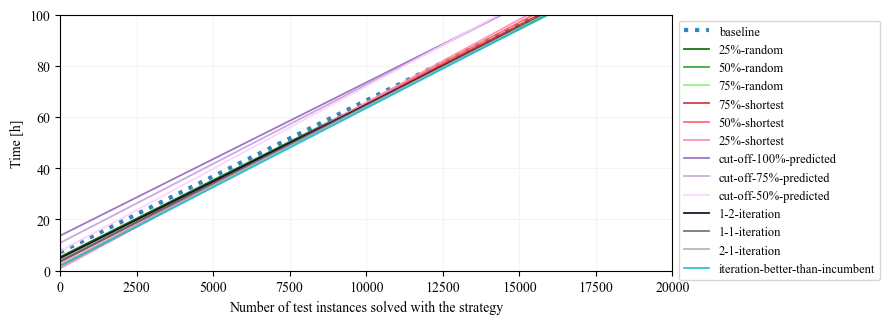

In [15]:
fig, ax = plt.subplots(figsize=(9, 3.35))

for (policy, parg), row in df25_agg.iterrows():
    alpha = row["cost"] / 3600
    beta = row["cpu_time"]
    ax.axline(
        (0, beta),
        slope=alpha,
        alpha=0.9,
        color=COLORS[(policy, parg)],
        lw=1.3 if policy != "baseline" else 3,
        ls="-" if policy != "baseline" else "dotted",
        label=LABELS[(policy, parg)],
    )

plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=9)
plt.ylabel("Time [h]")
plt.xlabel("Number of test instances solved with the strategy")
plt.xlim(0, 20000)
plt.ylim(0, 100)
plt.tight_layout()
# plt.savefig("simulation.pdf", bbox_inches="tight")
plt.show()

In [16]:
_ = pd.DataFrame(index=np.linspace(1, 100000, 100000).astype(int))

for (policy, parg), row in df25_agg.iterrows():
    alpha = row["cost"] / 3600
    beta = row["cpu_time"]
    label = LABELS[(policy, parg)]
    _[label] = _.index * alpha + beta
    
_["strategy"] = _.idxmin(axis=1)
_

,baseline,25%-random,50%-random,75%-random,75%-shortest,50%-shortest,25%-shortest,cut-off-100%-predicted,cut-off-75%-predicted,cut-off-50%-predicted,1-2-iteration,1-1-iteration,2-1-iteration,iteration-better-than-incumbent,strategy
1,7.228221,5.379489,3.756732,2.000972,3.414067,1.932534,0.859379,13.661480,10.850774,7.583940,4.849491,3.776263,2.466152,1.729670,25%-shortest
2,7.234142,5.385479,3.762763,2.007144,3.420234,1.938868,0.865859,13.667461,10.856948,7.590380,4.855483,3.782326,2.472304,1.735839,25%-shortest
3,7.240063,5.391468,3.768795,2.013316,3.426400,1.945201,0.872338,13.673441,10.863121,7.596819,4.861474,3.788390,2.478456,1.742009,25%-shortest
4,7.245985,5.397457,3.774827,2.019488,3.432567,1.951535,0.878818,13.679421,10.869295,7.603259,4.867466,3.794453,2.484608,1.748179,25%-shortest
5,7.251906,5.403447,3.780859,2.025660,3.438734,1.957869,0.885297,13.685402,10.875469,7.609699,4.873457,3.800516,2.490760,1.754349,25%-shortest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,599.312504,604.285654,606.898795,619.164557,620.063788,635.284198,648.765871,611.667690,628.197683,651.535074,603.963979,610.070947,617.638170,618.673821,baseline
99997,599.318425,604.291643,606.904827,619.170729,620.069955,635.290532,648.772351,611.673670,628.203856,651.541514,603.969970,610.077010,617.644322,618.679991,baseline
99998,599.324347,604.297632,606.910859,619.176901,620.076122,635.296866,648.778830,611.679650,628.210030,651.547954,603.975962,610.083074,617.650474,618.686160,baseline
99999,599.330268,604.303622,606.916891,619.183073,620.082289,635.303200,648.785310,611.685631,628.216204,651.554393,603.981953,610.089137,617.656626,618.692330,baseline


In [17]:
print(_.reset_index().groupby("strategy").agg(from_problem_count=("index", "min"), to_problem_count=("index", "max")).sort_values(by="from_problem_count").reset_index().style.to_latex())

\begin{tabular}{llrr}
 & strategy & from_problem_count & to_problem_count \\
0 & 25%-shortest & 1 & 2811 \\
1 & iteration-better-than-incumbent & 2812 & 14686 \\
2 & 50%-random & 14687 & 27131 \\
3 & 1-2-iteration & 27132 & 33835 \\
4 & baseline & 33836 & 100000 \\
\end{tabular}

